- Area
    - 400 m square
- Coverage
    - 5m transect intervals
    - 1-2m sweep width
- Assemblage
    - Assume fairly evenly scattered
    - 3 colors, each with 3 sizes (9 Layers)
    - What obtrusiveness level before you get their numbers? 
- Team
    - Assume highly skilled (at first)

In [1]:
import prospect
import numpy as np 
import matplotlib.pyplot as plt 
from tqdm.notebook import tqdm, trange
from typing import List

How often do we see these results based only on configuration?

- White large = 7%

Analysis suggests that if everything were perfect, this survey configuration would detect ~80% of the artifacts, on average, if only 28 were placed.

With surveyor skill of 0.9, this drops to 

In [2]:
def tonque_perfect(artifact_group: str, n_seeded_artifacts: int, n_surveys:int = 1000, sweep_width: float=2.0) -> List[float]:

    target_poisson_rate = n_seeded_artifacts / 160000

    # 400 x 400 meter area
    area = prospect.Area.from_area_value(name="Tonque", value=160000, vis=1.0)

    # Transects spaced 5 meters apart
    coverage = prospect.Coverage.from_transects(name="tonque_transects", area=area, spacing=5, sweep_width=sweep_width)

    # A single surveyor that finds everything they encounter
    surveyor = prospect.Surveyor(name="perfecto", team_name="single_perfect", surveyor_type="expert", skill=1.0)
    team = prospect.Team(name="single_perfect", surveyor_list=[surveyor])

    discovery_fracs = []
    for _ in trange(n_surveys):
        try:
            # Create artifact layer in a loop to guarantee there are 28 
            n_artifacts = 0
            while n_artifacts != n_seeded_artifacts:
                artifacts = prospect.Layer.from_poisson_points(rate=target_poisson_rate, name=f"{artifact_group}", area=area, assemblage_name="washers", ideal_obs_rate=1.0)
                n_artifacts = artifacts.df.shape[0]

            # Single-layer assemblage
            assemblage = prospect.Assemblage(name="washers", area_name="Tonque", layer_list=[artifacts])

            survey = prospect.Survey(name=f"simple_{artifact_group}", area=area, assemblage=assemblage, coverage=coverage, team=team)

            n_runs = 1
            survey.run(n_runs=n_runs)

            discovery_fracs.append(((survey.discovery["discovery_prob"] >= 0.9).sum() / n_runs) / artifacts.df.shape[0])
        except:
            discovery_fracs.append(0.0)

    return discovery_fracs

In [3]:
def tonque_perfect_stats(discovery_fracs: List[float], obs_frac: float):
    print(f"Mean artifacts discovered: {np.mean(discovery_fracs)}")
    print(f"Std Dev: {np.std(discovery_fracs)}")
    print(f"Min/Max: {np.min(discovery_fracs)}, {np.max(discovery_fracs)}")
    frac_lte_obs = len([val for val in discovery_fracs if val <= obs_frac]) / len(discovery_fracs)
    print(f"Fraction of 'perfect' surveys at or below observed: {frac_lte_obs}\n")
    
    fig, ax = plt.subplots()
    ax.hist(discovery_fracs)
    ax.axvline(obs_frac, color="black")

    return fig

## With 0.5m sweep width (0.5 meter on each side)

In [ ]:
white_large_05 = tonque_perfect("white_large", n_seeded_artifacts=28, n_surveys=2000, sweep_width=0.5)
tonque_perfect_stats(white_large_05, 0.71);

In [ ]:
white_medium_05 = tonque_perfect("white_medium", n_seeded_artifacts=43, n_surveys=2000, sweep_width=0.5)
tonque_perfect_stats(white_medium_05, 0.47);

In [ ]:
white_small_05 = tonque_perfect("white_small", n_seeded_artifacts=40, n_surveys=2000, sweep_width=0.5)
tonque_perfect_stats(white_small_05, 0.70);

In [ ]:
brown_large_05 = tonque_perfect("brown_large", n_seeded_artifacts=26, n_surveys=2000, sweep_width=0.5)
tonque_perfect_stats(brown_large_05, 0.62);

In [ ]:
brown_medium_05 = tonque_perfect("brown_medium", n_seeded_artifacts=44, n_surveys=2000, sweep_width=0.5)
tonque_perfect_stats(brown_medium_05, 0.30);

In [ ]:
brown_small_05 = tonque_perfect("brown_small", n_seeded_artifacts=43, n_surveys=2000, sweep_width=0.5)
tonque_perfect_stats(brown_small_05, 0.23);

In [ ]:
black_large_05 = tonque_perfect("black_large", n_seeded_artifacts=23, n_surveys=2000, sweep_width=0.5)
tonque_perfect_stats(black_large_05, 0.65);

In [ ]:
black_medium_05 = tonque_perfect("black_medium", n_seeded_artifacts=43, n_surveys=2000, sweep_width=0.5)
tonque_perfect_stats(black_medium_05, 0.37);

In [ ]:
black_small_05 = tonque_perfect("black_small", n_seeded_artifacts=38, n_surveys=2000, sweep_width=0.5)
tonque_perfect_stats(black_small_05, 0.53);

## With 1m sweep width (1 meter on each side)


Mean artifacts discovered: 0.40514285714285714
Std Dev: 0.09459678123703873
Min/Max: 0.10714285714285714, 0.75
Fraction of 'perfect' surveys at or below observed: 0.998



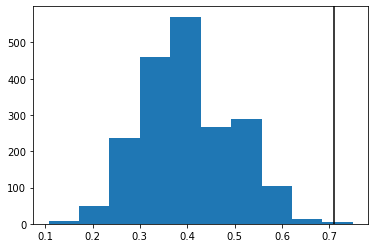

In [13]:
white_large_1 = tonque_perfect("white_large", n_seeded_artifacts=28, n_surveys=2000, sweep_width=1)
tonque_perfect_stats(white_large_1, 0.71);


Mean artifacts discovered: 0.400126
Std Dev: 0.02210665338761161
Min/Max: 0.33, 0.47
Fraction of 'perfect' surveys at or below observed: 1.0



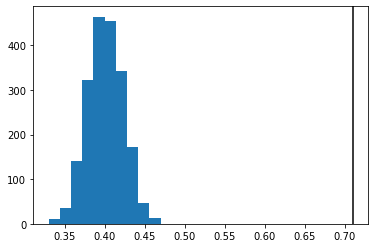

In [4]:
white_large_1 = tonque_perfect("white_large", n_seeded_artifacts=500, n_surveys=2000, sweep_width=1)
tonque_perfect_stats(white_large_1, 0.71);

In [ ]:
white_medium_1 = tonque_perfect("white_medium", n_seeded_artifacts=43, n_surveys=2000, sweep_width=1)
tonque_perfect_stats(white_medium_1, 0.47);


Mean artifacts discovered: 0.400351
Std Dev: 0.02126430810066483
Min/Max: 0.338, 0.476
Fraction of 'perfect' surveys at or below observed: 0.9995



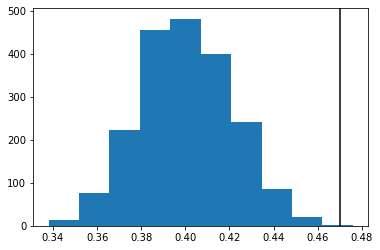

In [5]:
white_medium_1 = tonque_perfect("white_medium", n_seeded_artifacts=500, n_surveys=2000, sweep_width=1)
tonque_perfect_stats(white_medium_1, 0.47);

In [ ]:
white_small_1 = tonque_perfect("white_small", n_seeded_artifacts=40, n_surveys=2000, sweep_width=1)
tonque_perfect_stats(white_small_1, 0.70);


Mean artifacts discovered: 0.398894
Std Dev: 0.021450612205715713
Min/Max: 0.328, 0.476
Fraction of 'perfect' surveys at or below observed: 1.0



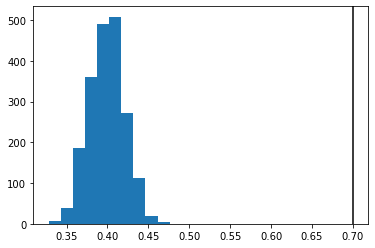

In [6]:
white_small_1 = tonque_perfect("white_small", n_seeded_artifacts=500, n_surveys=2000, sweep_width=1)
tonque_perfect_stats(white_small_1, 0.70);

In [ ]:
brown_large_1 = tonque_perfect("brown_large", n_seeded_artifacts=26, n_surveys=2000, sweep_width=1)
tonque_perfect_stats(brown_large_1, 0.62);


Mean artifacts discovered: 0.400111
Std Dev: 0.02192627827516562
Min/Max: 0.326, 0.49
Fraction of 'perfect' surveys at or below observed: 1.0



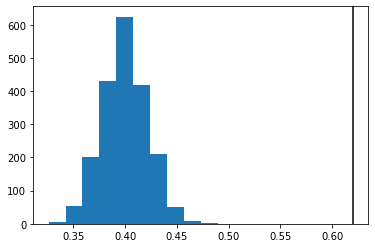

In [7]:
brown_large_1 = tonque_perfect("brown_large", n_seeded_artifacts=500, n_surveys=2000, sweep_width=1)
tonque_perfect_stats(brown_large_1, 0.62);


Mean artifacts discovered: 0.40152272727272725
Std Dev: 0.07194217934856774
Min/Max: 0.1590909090909091, 0.6136363636363636
Fraction of 'perfect' surveys at or below observed: 0.0915



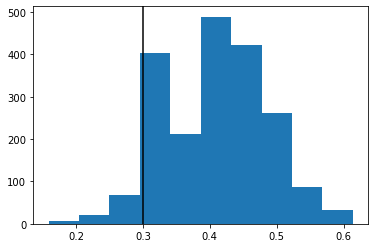

In [15]:
brown_medium_1 = tonque_perfect("brown_medium", n_seeded_artifacts=44, n_surveys=2000, sweep_width=1)
tonque_perfect_stats(brown_medium_1, 0.30);


Mean artifacts discovered: 0.400316
Std Dev: 0.021352005620081684
Min/Max: 0.332, 0.462
Fraction of 'perfect' surveys at or below observed: 0.0



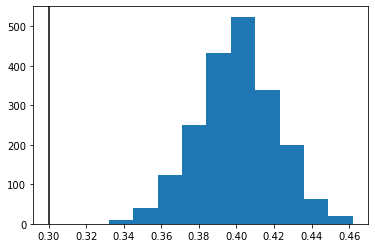

In [8]:
brown_medium_1 = tonque_perfect("brown_medium", n_seeded_artifacts=500, n_surveys=2000, sweep_width=1)
tonque_perfect_stats(brown_medium_1, 0.30);

In [ ]:
brown_small_1 = tonque_perfect("brown_small", n_seeded_artifacts=43, n_surveys=2000, sweep_width=1)
tonque_perfect_stats(brown_small_1, 0.23);


Mean artifacts discovered: 0.399577
Std Dev: 0.02158395401681536
Min/Max: 0.318, 0.484
Fraction of 'perfect' surveys at or below observed: 0.0



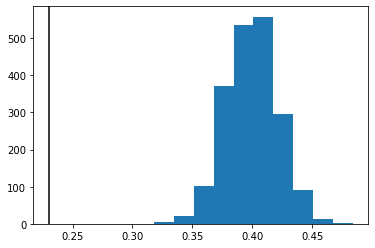

In [9]:
brown_small_1 = tonque_perfect("brown_small", n_seeded_artifacts=500, n_surveys=2000, sweep_width=1)
tonque_perfect_stats(brown_small_1, 0.23);


Mean artifacts discovered: 0.4018260869565217
Std Dev: 0.1033872087534886
Min/Max: 0.08695652173913043, 0.782608695652174
Fraction of 'perfect' surveys at or below observed: 0.9845



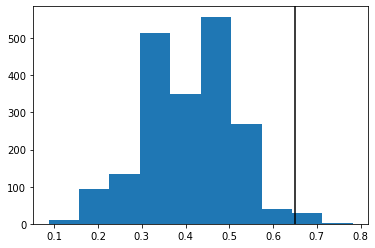

In [14]:
black_large_1 = tonque_perfect("black_large", n_seeded_artifacts=23, n_surveys=2000, sweep_width=1)
tonque_perfect_stats(black_large_1, 0.65);


Mean artifacts discovered: 0.399524
Std Dev: 0.021984117539714892
Min/Max: 0.318, 0.474
Fraction of 'perfect' surveys at or below observed: 1.0



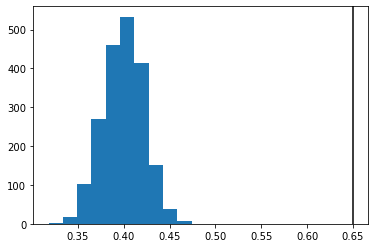

In [10]:
black_large_1 = tonque_perfect("black_large", n_seeded_artifacts=500, n_surveys=2000, sweep_width=1)
tonque_perfect_stats(black_large_1, 0.65);

In [ ]:
black_medium_1 = tonque_perfect("black_medium", n_seeded_artifacts=43, n_surveys=2000, sweep_width=1)
tonque_perfect_stats(black_medium_1, 0.37);


Mean artifacts discovered: 0.399574
Std Dev: 0.02184203571098628
Min/Max: 0.318, 0.494
Fraction of 'perfect' surveys at or below observed: 0.093



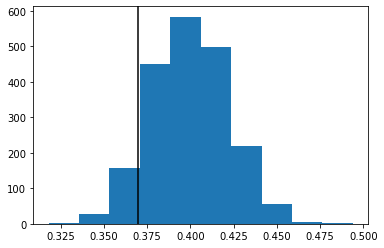

In [11]:
black_medium_1 = tonque_perfect("black_medium", n_seeded_artifacts=500, n_surveys=2000, sweep_width=1)
tonque_perfect_stats(black_medium_1, 0.37);

In [ ]:
black_small_1 = tonque_perfect("black_small", n_seeded_artifacts=38, n_surveys=2000, sweep_width=1)
tonque_perfect_stats(black_small_1, 0.53);


Mean artifacts discovered: 0.399265
Std Dev: 0.022247017215797714
Min/Max: 0.308, 0.468
Fraction of 'perfect' surveys at or below observed: 1.0



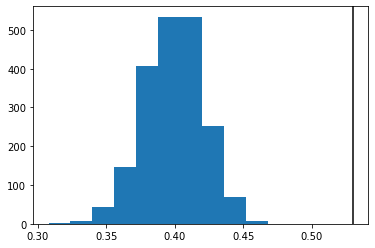

In [12]:
black_small_1 = tonque_perfect("black_small", n_seeded_artifacts=500, n_surveys=2000, sweep_width=1)
tonque_perfect_stats(black_small_1, 0.53);

## With 1.5m sweep width (1.5 meters on each side)

In [ ]:
white_large_15 = tonque_perfect("white_large", n_seeded_artifacts=28, n_surveys=2000, sweep_width=1.5)
tonque_perfect_stats(white_large_15, 0.71);

In [ ]:
white_medium_15 = tonque_perfect("white_medium", n_seeded_artifacts=43, n_surveys=2000, sweep_width=1.5)
tonque_perfect_stats(white_medium_15, 0.47);

In [ ]:
white_small_15 = tonque_perfect("white_small", n_seeded_artifacts=40, n_surveys=2000, sweep_width=1.5)
tonque_perfect_stats(white_small_15, 0.70);

In [ ]:
brown_large_15 = tonque_perfect("brown_large", n_seeded_artifacts=26, n_surveys=2000, sweep_width=1.5)
tonque_perfect_stats(brown_large_15, 0.62);

In [ ]:
brown_medium_15 = tonque_perfect("brown_medium", n_seeded_artifacts=44, n_surveys=2000, sweep_width=1.5)
tonque_perfect_stats(brown_medium_15, 0.30);

In [ ]:
brown_small_15 = tonque_perfect("brown_small", n_seeded_artifacts=43, n_surveys=2000, sweep_width=1.5)
tonque_perfect_stats(brown_small_15, 0.23);

In [ ]:
black_large_15 = tonque_perfect("black_large", n_seeded_artifacts=23, n_surveys=2000, sweep_width=1.5)
tonque_perfect_stats(black_large_15, 0.65);

In [ ]:
black_medium_15 = tonque_perfect("black_medium", n_seeded_artifacts=43, n_surveys=2000, sweep_width=1.5)
tonque_perfect_stats(black_medium_15, 0.37);

In [ ]:
black_small_15 = tonque_perfect("black_small", n_seeded_artifacts=38, n_surveys=2000, sweep_width=1.5)
tonque_perfect_stats(black_small_15, 0.53);

## With 2m sweep width (2 meters on each side)

In [ ]:
white_large_2 = tonque_perfect("white_large", n_seeded_artifacts=28, n_surveys=2000, sweep_width=2)
tonque_perfect_stats(white_large_2, 0.71);

In [ ]:
white_medium_2 = tonque_perfect("white_medium", n_seeded_artifacts=43, n_surveys=2000, sweep_width=2)
tonque_perfect_stats(white_medium_2, 0.47);

In [ ]:
white_small_2 = tonque_perfect("white_small", n_seeded_artifacts=40, n_surveys=2000, sweep_width=2)
tonque_perfect_stats(white_small_2, 0.70);

In [ ]:
brown_large_2 = tonque_perfect("brown_large", n_seeded_artifacts=26, n_surveys=2000, sweep_width=2)
tonque_perfect_stats(brown_large_2, 0.62);

In [ ]:
brown_medium_2 = tonque_perfect("brown_medium", n_seeded_artifacts=44, n_surveys=2000, sweep_width=2)
tonque_perfect_stats(brown_medium_2, 0.30);

In [ ]:
brown_small_2 = tonque_perfect("brown_small", n_seeded_artifacts=43, n_surveys=2000, sweep_width=2)
tonque_perfect_stats(brown_small_2, 0.23);

In [ ]:
black_large_2 = tonque_perfect("black_large", n_seeded_artifacts=23, n_surveys=2000, sweep_width=2)
tonque_perfect_stats(black_large_2, 0.65);

In [ ]:
black_medium_2 = tonque_perfect("black_medium", n_seeded_artifacts=43, n_surveys=2000, sweep_width=2)
tonque_perfect_stats(black_medium_2, 0.37);

In [ ]:
black_small_2 = tonque_perfect("black_small", n_seeded_artifacts=38, n_surveys=2000, sweep_width=2)
tonque_perfect_stats(black_small_2, 0.53);

In [ ]:
OBS_PCT = 0.71

print(f"Mean artifacts discovered: {np.mean(white_large)}")
len([val for val in pct_discovered if val < 0.71]) / len(pct_discovered)

plt.hist(white_large);

In [ ]:
plt.hist(pct_discovered)

In [ ]:
len([val for val in pct_discovered if val < 0.71]) / len(pct_discovered)

In [ ]:
np.quantile(pct_discovered, 0.078)

In [ ]:
48 / 500

In [ ]:
coverage = prospect.Coverage.from_transects(name="tonque_transects", area=area, spacing=5, sweep_width=2)

In [ ]:
white_small = prospect.Layer.from_pseudorandom_points(n=40, name="white_small", area=area, assemblage_name="washers", ideal_obs_rate=1.0)

In [ ]:
assemblage = prospect.Assemblage(name="washers", area_name="Tonque", layer_list=[white_small])

In [ ]:
surveyor = prospect.Surveyor(name="mr_perfect", team_name="single_perfect", surveyor_type="expert", skill=0.9)
team = prospect.Team(name="single_perfect", surveyor_list=[surveyor])

In [ ]:
survey = prospect.Survey(name="simple_white_small", area=area, assemblage=assemblage, coverage=coverage, team=team)

In [ ]:
n_runs = 100
survey.run(n_runs=n_runs)

In [ ]:
((survey.discovery["discovery_prob"] > 0.5).sum() / n_runs) / white_small.df.shape[0]

In [ ]:
survey.discovery

In [ ]:
prospect.Survey.discovery_plot?

# Summary
- Area
    - Single transect
    - Four locations
        - football field with sod
            - grassy field visibility
            - 20m x 100m
            - North orientation
            - 49 fieldwalkers
            - 71 chert flakes
            - 66 terracotta sherds
            - 100 stoneware sherds
            - 20 washers
        - plowed field on the Niagara Escarpment
            - 25 cm deep plow furrows, brown soil, some grass, weeds visible
            - Not disked
            - Small stones and some leaves were potential false targets
            - 20m x 50m
            - East orientation (5 went west)
            - 37 fieldwalkers
            - 100 chert flakes
            - 100 terracotta sherds
            - 101 stoneware sherds
            - 30 washers
        - dark-colored gravel surface
            - parking lot, crushed slag gravel
            - false targets: glass, car metal, cigarette butts, bottle caps, straw
            - 20m x 100m
            - South orientation
            - 87 fieldwalkers
            - 79 chert flakes
            - 80 terracotta sherds
            - 60 stoneware sherds
            - 30 washers
        - light-colored gravel surface
            - grid split into two 50m sections
            - false targets: bottle glass, bottle caps, condom
            - 18m x 100m (only 5 grid columns on ones side of the transect, 4 on the other)
            - South orientation
            - 157 fieldwalkers
            - 90 chert flakes
            - 90 terracotta sherds
            - 90 stoneware sherds
            - 36 washers
    - 2m grid over area: 5 squares left, 5 squares right (except at light-gravel)
- Assemblage
    - chert flakes: gray in colored
    - terracotta sherds: modern flowerpots
    - stoneware: blue and white, glazed
    - washers: 25 mm in diameter aluminum
    - each long column in the grid had same number of each type of artifact
- Team
    - Most were inexperience students but some were experienced archaeologists
    - Some overlap
    - A few people did all Four
    - 
- Use data from artifacts within 4m each side